 # " Scraping the prices of Smartwatches from the jumia.co.ke website

                                                                                      Items  Prices
0                                  Generic Y68 1.44 Inch Smart Watch Fitness Smart Bracelet   599.0
1                                Generic Color Screen Smart Watch Heart Rate Sport Bracelet   649.0
2                                Generic Color Screen Smart Watch Heart Rate Sport Bracelet   880.0
3  Generic I Watch Series 7 Full Touch Sports Smart Watch Fitness Tracker Bluetooth Calling  1990.0
4                                 Generic Full Touch Screen Smart Watch - For Android & IOS  1290.0
5                                                      Fashion T500 Smart Watch 8 Pink/gold  1999.0
6     Oraimo Smartwatch Lite  1.69'' TFT With Call & Message Reminder, 61 Sport Modes-Black  3599.0
7                           Generic I Watch 5 Full Touch Sports Smart Watch Fitness Tracker   690.0
8                                 Generic ColorScreen  SmartWatch Heart Rate Sport Bracelet   592.0


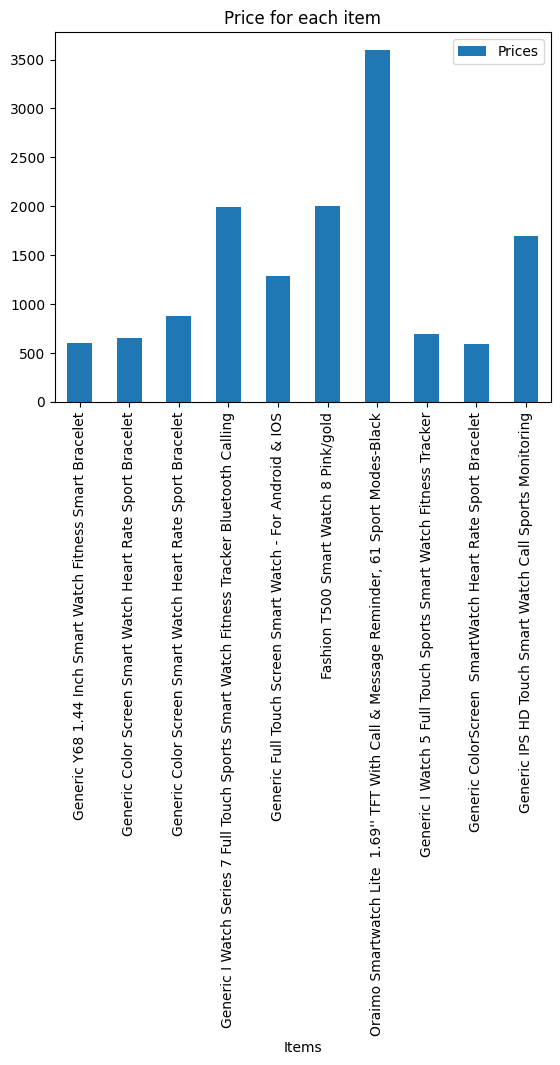

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

items = []   # List to store names of the products
prices = []     # List to store prices of the products

sp = requests.get("https://www.jumia.co.ke/smart-watches/#catalog-listing")
sp = BeautifulSoup(sp.content, 'html.parser')

for each in sp.find_all('div', attrs={'class':'info'}):
    item = each.find('h3', attrs={'class':'name'})
    price = each.find('div', attrs={'class':'prc'})

    if item is None:    # Caters for instances where the name does not exist
        items.append(None)
    else:
        items.append(item.text) # Get the text part

    if price is None:
        prices.append(None)
    else:
        prices.append(price.text)

# Cleaning and storing data in a dataframe
df = pd.DataFrame({'Items': items, 'Prices': prices}) 
df['Prices'] = df['Prices'].str.replace('KSh ', '') # strip off the commas from the 'Prices' column to get the values
df['Prices'] = df['Prices'].str.replace(',', '')# strip off 'Ksh ' from the 'Prices' column to get the values
df['Prices'] = df['Prices'].astype(float) # convert the Prices column to numeric to plot the data

# select the first 10 rows of the dataframe for plotting
df_top10 = df.head(10)
print(df_top10.to_string())

# Output the DataFrame to CSV file
df_top10.to_csv('smartwatches.csv', index = False)

#Visualizing the data using a bar chart
df_chart = pd.read_csv("smartwatches.csv")
df_chart.plot(kind='bar', x='Items', y='Prices', title='Price for each item')
plt.show()